# `intake-esgf`: Programmatic Access to ESGF Holdings

ESGF holdings are vast, so catalogs initialize empty and are populated with a search. 

In [1]:
from intake_esgf import ESGFCatalog

cat = ESGFCatalog().search(
    source_id="CanESM5",  # The Canadian model...
    experiment_id="historical",  # run over 1850-2015...
    frequency="mon",  # monthly mean output for...
    variable_id=[
        "gpp",  # gross primary productivity...
        "tas",  # surface air temperature...
        "pr",  # and precipitation
    ],
)

   Searching indices:   0%|          |0/2 [       ?index/s]

This search queries a configurable set of indices and returns merged results in the form of a pandas dataframe.

The user can directly access and manipulate the dataframe.

In [2]:
cat.df

,project,mip_era,activity_drs,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,version,id
0,CMIP6,CMIP6,CMIP,CCCma,CanESM5,historical,r28i1p2f1,Lmon,gpp,gn,20190429,[CMIP6.CMIP.CCCma.CanESM5.historical.r28i1p2f1...
1,CMIP6,CMIP6,CMIP,CCCma,CanESM5,historical,r6i1p2f1,Lmon,gpp,gn,20190429,[CMIP6.CMIP.CCCma.CanESM5.historical.r6i1p2f1....
2,CMIP6,CMIP6,CMIP,CCCma,CanESM5,historical,r14i1p1f1,Amon,tas,gn,20190429,[CMIP6.CMIP.CCCma.CanESM5.historical.r14i1p1f1...
3,CMIP6,CMIP6,CMIP,CCCma,CanESM5,historical,r20i1p2f1,Amon,tas,gn,20190429,[CMIP6.CMIP.CCCma.CanESM5.historical.r20i1p2f1...
4,CMIP6,CMIP6,CMIP,CCCma,CanESM5,historical,r26i1p2f1,Lmon,gpp,gn,20190429,[CMIP6.CMIP.CCCma.CanESM5.historical.r26i1p2f1...
...,...,...,...,...,...,...,...,...,...,...,...,...
190,CMIP6,CMIP6,CMIP,CCCma,CanESM5,historical,r19i1p1f1,Amon,pr,gn,20190429,[CMIP6.CMIP.CCCma.CanESM5.historical.r19i1p1f1...
191,CMIP6,CMIP6,CMIP,CCCma,CanESM5,historical,r4i1p2f1,Amon,pr,gn,20190429,[CMIP6.CMIP.CCCma.CanESM5.historical.r4i1p2f1....
192,CMIP6,CMIP6,CMIP,CCCma,CanESM5,historical,r36i1p2f1,Amon,pr,gn,20190429,[CMIP6.CMIP.CCCma.CanESM5.historical.r36i1p2f1...
193,CMIP6,CMIP6,CMIP,CCCma,CanESM5,historical,r37i1p2f1,Amon,pr,gn,20190429,[CMIP6.CMIP.CCCma.CanESM5.historical.r37i1p2f1...


Or they can just print the catalog to see the dataframe columns and a truncated list of unique values.

In [3]:
print(cat)

Summary information for 195 results:
mip_era                                                     [CMIP6]
activity_drs                                                 [CMIP]
institution_id                                              [CCCma]
source_id                                                 [CanESM5]
experiment_id                                          [historical]
member_id         [r28i1p2f1, r6i1p2f1, r14i1p1f1, r20i1p2f1, r2...
table_id                                               [Lmon, Amon]
variable_id                                          [gpp, tas, pr]
grid_label                                                     [gn]
dtype: object


The user can use this information to improve their query.

In [4]:
cat = ESGFCatalog().search(
    source_id="CanESM5",
    experiment_id="historical",
    frequency="mon",
    variable_id=["gpp", "tas", "pr"],
    member_id="r1i1p1f1",  # <-- addition from the last search
)
print(cat)

   Searching indices:   0%|          |0/2 [       ?index/s]

Summary information for 3 results:
mip_era                  [CMIP6]
activity_drs              [CMIP]
institution_id           [CCCma]
source_id              [CanESM5]
experiment_id       [historical]
member_id             [r1i1p1f1]
table_id            [Amon, Lmon]
variable_id       [tas, pr, gpp]
grid_label                  [gn]
dtype: object


Once the search is honed in on the desired datasets, a single function call will download or load them into memory as a dictionary of xarray Datasets.

In [5]:
dsd = cat.to_dataset_dict()

Get file information:   0%|          |0/2 [       ?index/s]

Adding cell measures:   0%|          |0/3 [     ?dataset/s]

This will communicate with the index nodes again to find optimal transfer hosts and even associate auxillary data like cell measures with the output datasets.

### Access Method Priority

1. Use local paths if files are found to be present (previously downloaded or directly available).
2. Use remote links if the user indicates `prefer_streaming=True` and access links are present in the file records (OPeNDAP for now, expandable to Zarr/Kerchunk/VirtualiZarr).
3. Use Globus Transfer to move files if a destination `globus_endpoint=UUID` has been given and files are present on at least one source Globus endpoint.
4. Download the remaining files using a threaded https transfer.


Keys to the returned dictionary are formed from the facet values which are different.

In [6]:
dsd['Amon.tas']

<xarray.Dataset> Size: 65MB
Dimensions:    (time: 1980, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 32kB ...
    lat_bnds   (lat, bnds) float64 1kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    tas        (time, lat, lon) float32 65MB ...
    areacella  (lat, lon) float32 33kB ...
Attributes: (12/55)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    variant_label:               r1i1p1f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0
    activity_drs:                CMIP
    member_id:                   r1i1p1f1

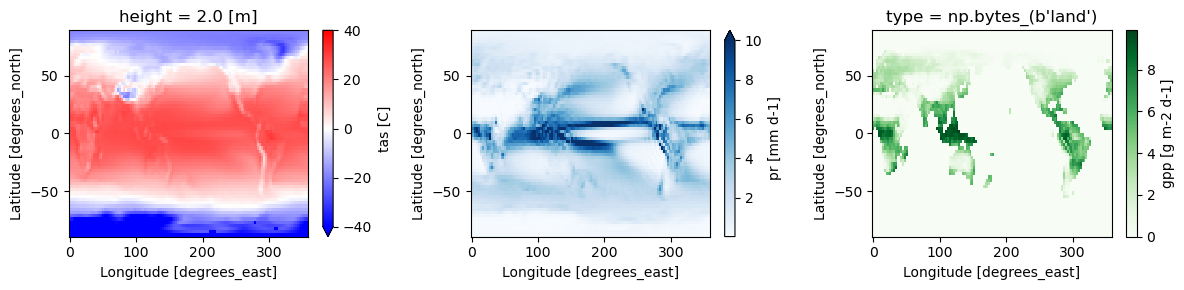

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(12, 3), ncols=3, tight_layout=True)

# temperature
ds = dsd["Amon.tas"]["tas"].mean(dim="time") - 273.15  # to [C]
ds.plot(ax=axs[0], cmap="bwr", vmin=-40, vmax=40, cbar_kwargs={"label": "tas [C]"})

# precipitation
ds = dsd["Amon.pr"]["pr"].mean(dim="time") * 86400 / 999.8 * 1000  # to [mm d-1]
ds.plot(ax=axs[1], cmap="Blues", vmax=10, cbar_kwargs={"label": "pr [mm d-1]"})

# gross primary productivty
ds = dsd["Lmon.gpp"]["gpp"].mean(dim="time") * 86400 * 1000  # to [g m-2 d-1]
ds.plot(ax=axs[2], cmap="Greens", cbar_kwargs={"label": "gpp [g m-2 d-1]"})
plt.tight_layout()

# Key Points

1. The programmatic nature of the interface allows users to have a conversation with the index.
2. We hide many of the ugly parts of data access and use past transfers to guide optimal host selection.
3. Where possible, we automate tasks which are time-consuming 
4. This interface *unifies* scripts to be run locally with those that will access data remotely.